In [74]:
#https://kaabar-sofien.medium.com/the-choppiness-index-detecting-trends-sideways-8392b38d9d66

import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
from datetime import date, timedelta
import datetime
from ta.volume import VolumeWeightedAveragePrice
import ta

import warnings
warnings.filterwarnings('ignore')

In [75]:
symbol = 'ETH-USD'
df = yf.download(symbol, start = '2021-11-1', progress=False, interval = '1h')
df = df.drop(['Adj Close'], axis = 1)

In [76]:
# VWAP
def vwap(dataframe, label='VWAP', window=15, fillna=True):
    dataframe[label] = VolumeWeightedAveragePrice(high=dataframe['High'], 
                                                  low=dataframe['Low'], 
                                                  close=dataframe["Close"], 
                                                  volume=dataframe['Volume'], 
                                                  window=window, 
                                                  fillna=fillna).volume_weighted_average_price()
    return dataframe

df = vwap(df)
# BOLLINGER BAND
df["bb_low"] = ta.volatility.BollingerBands(
    df["Close"], window=14, window_dev=2).bollinger_lband()

# RSI
df['RSI'] = ta.momentum.RSIIndicator(df["Close"], window=14).rsi()
df.tail()

,Open,High,Low,Close,Volume,VWAP,bb_low,RSI
2023-05-02 02:00:00+00:00,1826.301880,1829.515625,1824.327026,1829.274292,0,1835.214003,1811.371787,40.534932
2023-05-02 03:00:00+00:00,1829.272949,1830.805298,1824.641235,1830.630493,24275968,1833.217043,1811.678566,41.578101
2023-05-02 04:00:00+00:00,1830.551636,1831.621826,1825.760132,1826.375610,25753088,1832.258868,1812.085655,39.251625
2023-05-02 05:00:00+00:00,1825.197021,1828.341553,1825.197021,1828.300415,5190656,1823.188930,1811.977373,40.863652
2023-05-02 05:14:00+00:00,1828.179688,1828.179688,1828.179688,1828.179688,0,1823.188930,1812.349097,40.790538


In [77]:
df['MaxOpenClose'] = df[['Open', 'Close']].max(axis = 1)
df['Signal'] = np.where((df['MaxOpenClose'] > df['VWAP']) & 
                        (df['MaxOpenClose'].shift(1) > df['VWAP'].shift(1))& 
                        (df['MaxOpenClose'].shift(2) > df['VWAP'].shift(2))& 
                        (df['MaxOpenClose'].shift(3) > df['VWAP'].shift(3))& 
                        (df['MaxOpenClose'].shift(4) > df['VWAP'].shift(4))& 
                        (df['MaxOpenClose'].shift(5) > df['VWAP'].shift(5))& 
                        (df['MaxOpenClose'].shift(6) > df['VWAP'].shift(6))& 
                        (df['MaxOpenClose'].shift(7) > df['VWAP'].shift(7))& 
                        (df['MaxOpenClose'].shift(8) > df['VWAP'].shift(8))& 
                        (df['MaxOpenClose'].shift(9) > df['VWAP'].shift(9))& 
                        (df['MaxOpenClose'].shift(10) > df['VWAP'].shift(10))& 
                        (df['MaxOpenClose'].shift(11) > df['VWAP'].shift(11))& 
                        (df['MaxOpenClose'].shift(12) > df['VWAP'].shift(12))& 
                        (df['MaxOpenClose'].shift(13) > df['VWAP'].shift(13))& 
                        (df['MaxOpenClose'].shift(14) > df['VWAP'].shift(14))& 
                        (df['MaxOpenClose'].shift(15) > df['VWAP'].shift(15))&
                        (df['Close'] <= df['bb_low']) & 
                        (df['RSI'] <= 45),
                        1, 0)

df[df['Signal'] == 1]

,Open,High,Low,Close,Volume,VWAP,bb_low,RSI,MaxOpenClose,Signal
2021-11-20 15:00:00+00:00,4291.231445,4291.609375,4217.660645,4220.485840,0,4224.183105,4245.516058,41.727736,4291.231445,1
2021-11-27 20:00:00+00:00,4124.776367,4132.379883,4056.357178,4056.357178,0,4104.230143,4083.079446,36.425950,4124.776367,1
2021-11-28 01:00:00+00:00,4083.277588,4083.277588,4029.009033,4033.570557,0,4070.192708,4042.215427,37.002559,4083.277588,1
2022-02-13 16:00:00+00:00,2924.350586,2924.505371,2884.606689,2890.134521,0,2917.157467,2901.117640,37.759227,2924.350586,1
2022-04-23 23:00:00+00:00,2959.015137,2959.015137,2935.542725,2938.077637,88264704,2944.211833,2944.637467,34.997501,2959.015137,1
2022-05-07 21:00:00+00:00,2674.536133,2675.830566,2641.206055,2641.206055,439265280,2652.747559,2657.695698,31.152841,2674.536133,1
2022-05-07 22:00:00+00:00,2639.835205,2639.835205,2599.523438,2604.839600,1121433600,2625.432176,2629.813200,23.998905,2639.835205,1
2022-05-20 14:00:00+00:00,2041.985107,2042.087402,1989.702271,1989.872559,0,2028.575684,1996.863711,43.264541,2041.985107,1
2022-05-22 04:00:00+00:00,1974.227783,1974.227783,1967.207031,1967.207031,0,1960.416626,1967.264820,43.912803,1974.227783,1
2022-08-19 00:00:00+00:00,1847.095337,1847.095337,1819.477173,1827.828125,813437952,1843.433160,1838.579841,35.672558,1847.095337,1


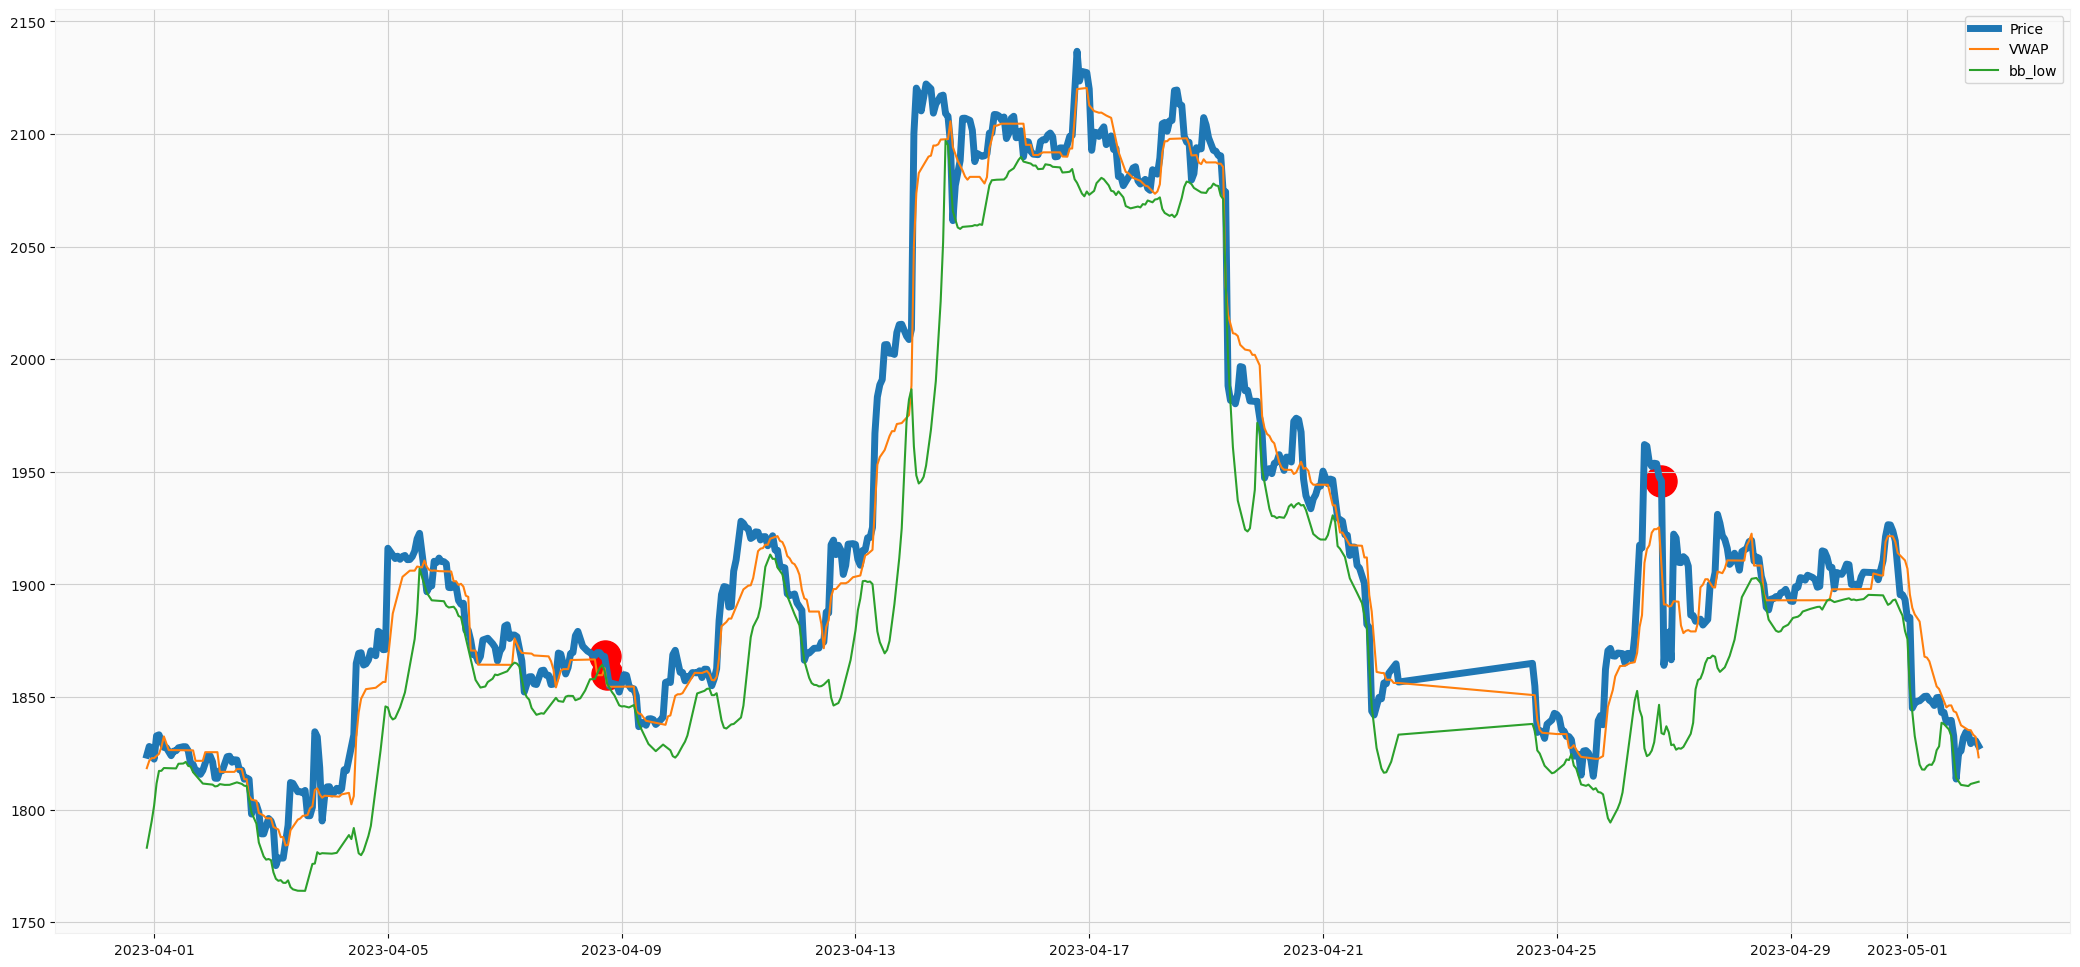

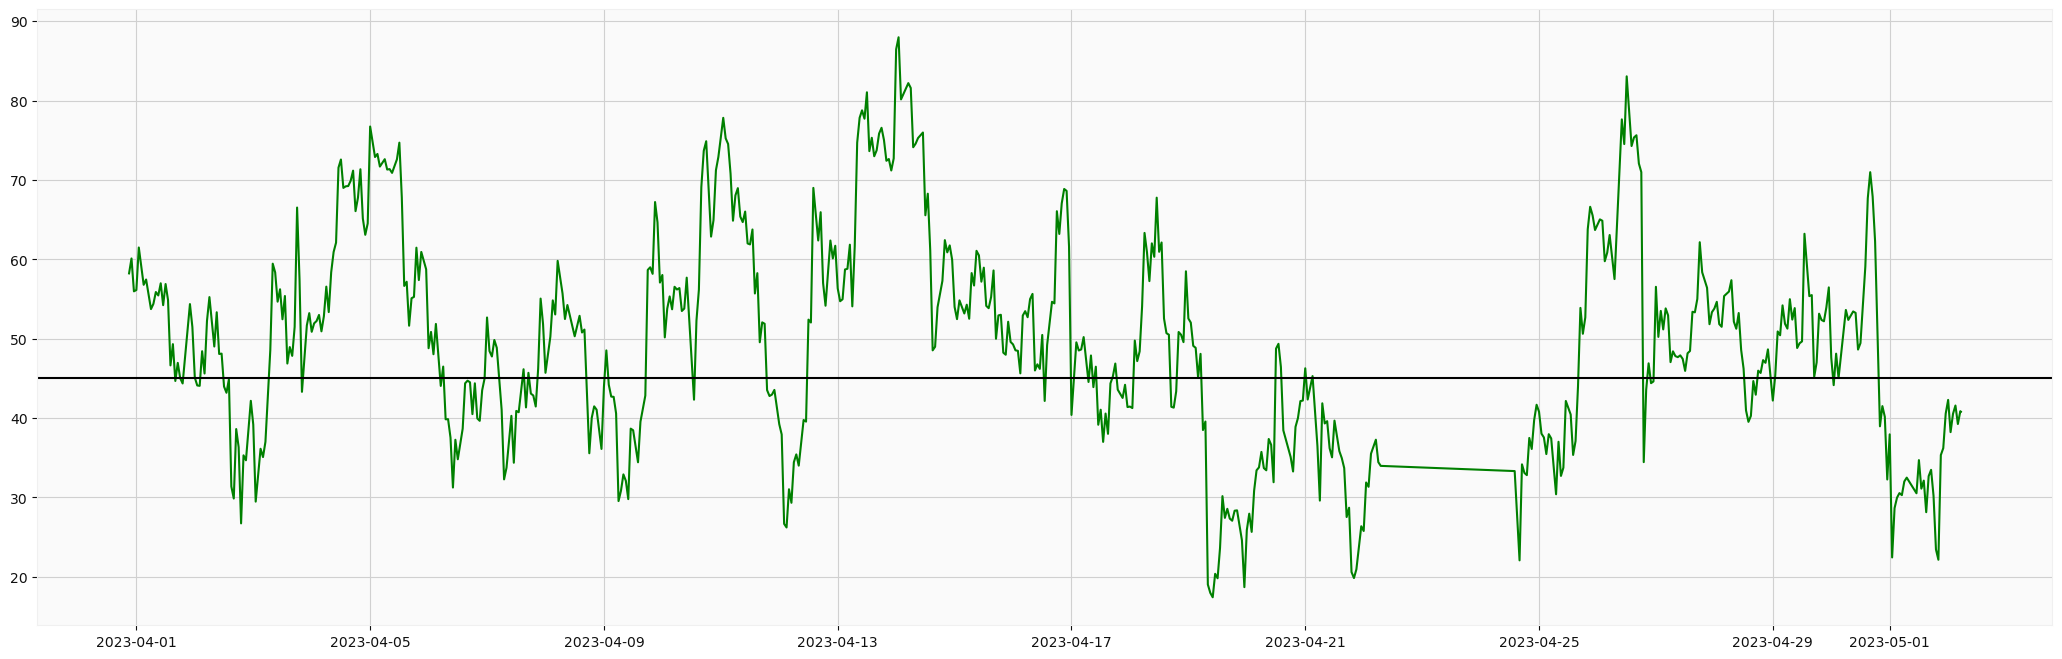

In [110]:
plot_points = 700

plt.figure(figsize = (26, 12))
plt.plot(df['MaxOpenClose'][-plot_points:], label = 'Price', lw = 5)
plt.plot(df['VWAP'][-plot_points:], label = 'VWAP')
plt.plot(df['bb_low'][-plot_points:], label = 'bb_low')
plt.scatter(df[-plot_points:][df['Signal'] == 1].index, 
            df[-plot_points:][df['Signal'] == 1]['MaxOpenClose'],
            s = 500, color = 'red')
plt.legend()
plt.show()
plt.figure(figsize = (26, 8))
plt.plot(df['RSI'][-plot_points:], label = 'RSI', color = 'green')
plt.axhline(45, color = 'black')
plt.show()